### Initialization

In [241]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [242]:
df =pd.read_csv('E:\TRANSFORMASI\Data Science\Day 15 Statistik Piton 3/car_dataset.csv')

In [4]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
data = pd.DataFrame(df)

In [8]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [185]:
data_mis=data.isnull().sum()
data_mis

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [186]:
#Sanity Cleansing
data['Engine HP']=data['Engine HP'].fillna(value=data['Engine HP'].median())
data['Engine Fuel Type']=data['Engine Fuel Type'].fillna(value=data['Engine Fuel Type'].mode())
data['Engine Fuel Type'] = np.where(data['Engine Fuel Type'] == ' ','regular unleaded', data['Engine Fuel Type']) 
data['Engine Cylinders']=data['Engine Cylinders'].fillna(value=data['Engine Cylinders'].median())
data['Number of Doors']=data['Number of Doors'].fillna(value=data['Number of Doors'].median())

#Drop high errors Market Category with NA values rate 45.8%
data=data.drop(columns='Market Category')

data_mis

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11914 entries, 2116 to 10301
Data columns (total 15 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11914 non-null object
Engine HP            11914 non-null float64
Engine Cylinders     11914 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11914 non-null float64
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 1.8+ MB


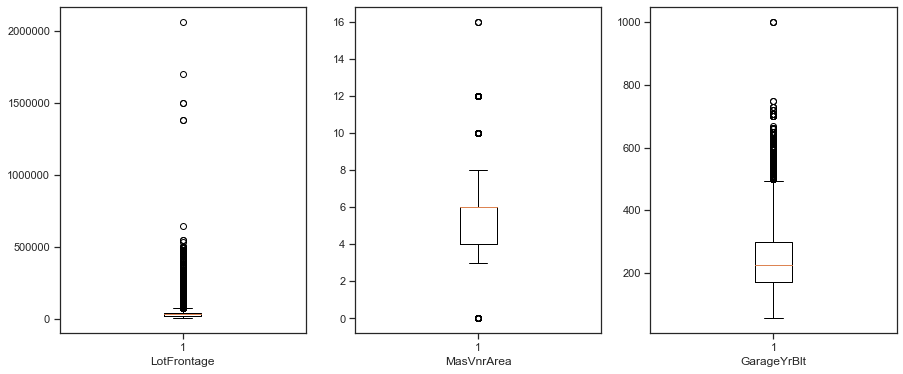

In [256]:
#Before Working with Outliers
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.boxplot(data['MSRP'])
plt.xlabel('LotFrontage')

plt.subplot(1,3,2)
plt.boxplot(data["Engine Cylinders"])
plt.xlabel('MasVnrArea')

plt.subplot(1,3,3)
plt.boxplot(data['Engine HP'])
plt.xlabel('GarageYrBlt')

plt.show()

### Vizualization

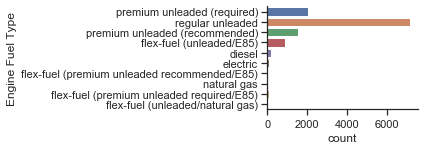

In [359]:
#Count of Engine Full Type 
ax = sns.catplot(y="Engine Fuel Type", kind="count", data=df, height=2, aspect=3, orient='h')

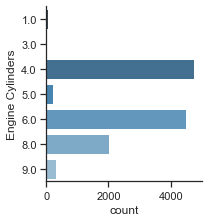

In [351]:
#Count of Engine Cylinders
bx = sns.catplot(y="Engine Cylinders", kind="count", data=df, height=3, aspect=1, orient='h',palette='Blues_d')

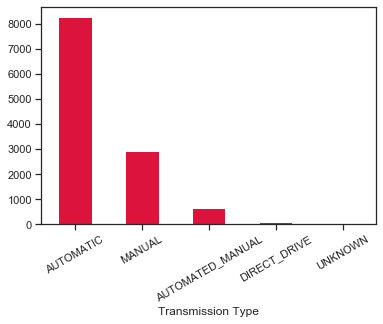

In [363]:
#Count of Transmission Type
data['Transmission Type'].value_counts(normalize=False).plot.bar(rot=30,color=['crimson'])
plt.xlabel('Transmission Type')
plt.show()

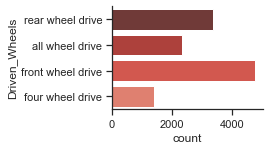

In [365]:
#Count Driven_Wheels
ax = sns.catplot(y='Driven_Wheels', kind='count',data=data,height=2, aspect=2, orient ='h',palette='Reds_d')

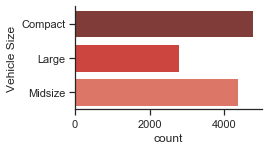

In [364]:
#Count of Vehicle Size
fx = sns.catplot(y="Vehicle Size", kind="count", data=data, height=2, aspect=2, orient='h',palette='Reds_d')

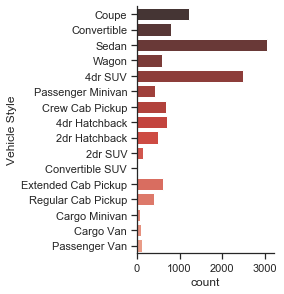

In [367]:
#Count of Vehicle Style
gx = sns.catplot(y="Vehicle Style", kind="count", data=data, height=4, aspect=1, orient='h',palette='Reds_d')

In [ ]:
# Since Age data types is float, so it need to define the data distribution before decided what method to fill the missing value

[Text(0, 0.5, '#Num'),
 Text(0.5, 0, 'Engine Cylinders'),
 Text(0.5, 1.0, 'Engine Cylinders Number')]

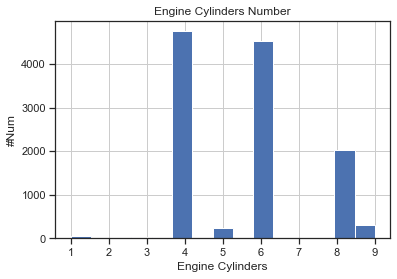

In [370]:
# Histogram of Engine Cylinders
EngineCyN = data["Engine Cylinders"].hist(bins=15)
EngineCyN.set(xlabel ='Engine Cylinders',ylabel='#Num', Title="Engine Cylinders Number")

[Text(0, 0.5, '#Num'),
 Text(0.5, 0, 'Engine HP'),
 Text(0.5, 1.0, 'Engine HP Number')]

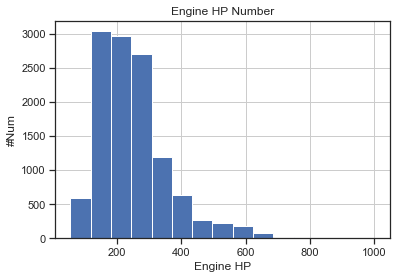

In [262]:
# Histogram of Engine HP
EngineHP = data["Engine HP"].hist(bins=15)
EngineHP.set(xlabel ='Engine HP',ylabel='#Num', Title="Engine HP Number")

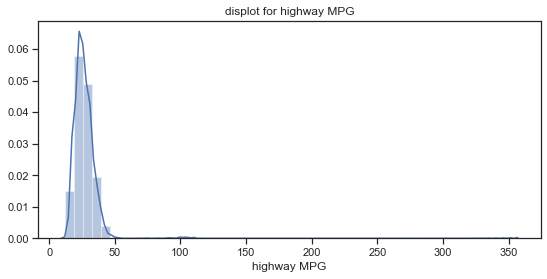

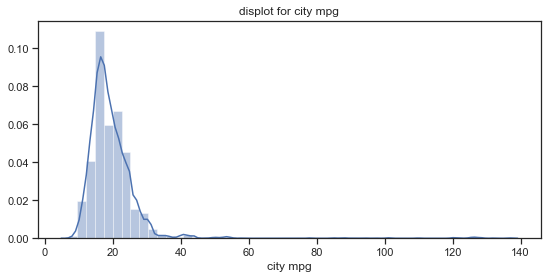

In [263]:
# Distplot MPG
def distplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("displot for {}".format(feature))
    ax0 = sns.distplot(data[feature].dropna())
distplot('highway MPG')
distplot('city mpg')

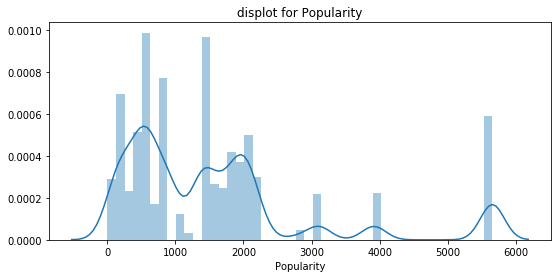

In [57]:
# Displot of Popularity
def distplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("displot for {}".format(feature))
    ax0 = sns.distplot(data[feature].dropna())
distplot('Popularity')

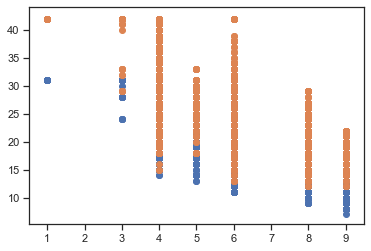

In [374]:
# Scatter of MPG
# Higher Engine Cylinder make both of city mpg and highway mpg lower
plt.scatter(data['Engine Cylinders'], data['city mpg'])
plt.scatter(data['Engine Cylinders'], data['highway MPG'])

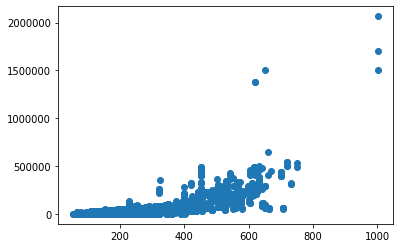

In [61]:
# Hihger engine HP got the higher MSRP price
plt.scatter(data['Engine HP'], data['MSRP'])

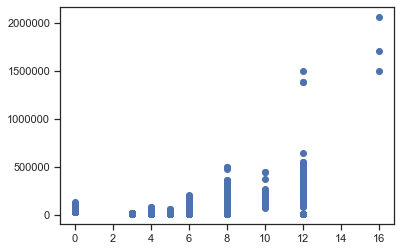

In [266]:
# Hihger engine Cylinder got the higher MSRP price
plt.scatter(data['Engine Cylinders'], data['MSRP'])

In [ ]:
#Continue...

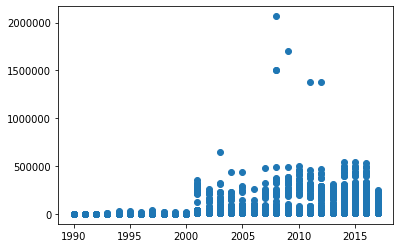

In [64]:
# The newer Year the higher MSRP price
plt.scatter(data['Year'], data['MSRP'])

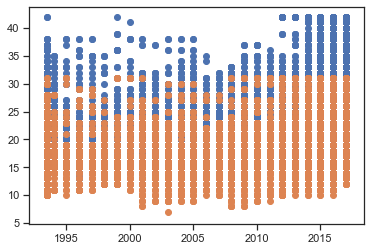

In [375]:
# There is no gradual increase for both city mpg and highway mpg fromm year 1990-2010, but it significantly increase above 2010
plt.scatter(data['Year'], data['highway MPG'])
plt.scatter(data['Year'], data['city mpg'])

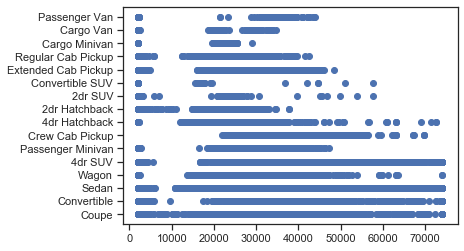

In [376]:
# Sedan, Convertible, Coupe, is vehicle Style with most expensive MSRP
plt.scatter(data['MSRP'], data['Vehicle Style'])

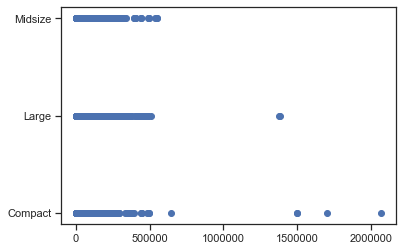

In [268]:
# Not Important
plt.scatter(data['MSRP'], data['Vehicle Size'])

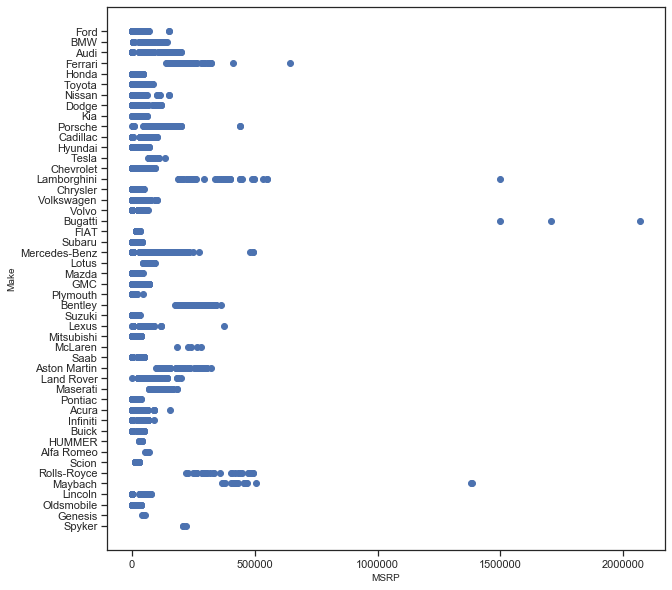

In [267]:
# Bugatti, Lamborgini, Maybach are the most expensive MSRP
plt.figure(figsize=(10,10))
plt.scatter(data['MSRP'], data['Make'])

plt.xlabel('MSRP', fontsize=10)
plt.ylabel('Make', fontsize=10)

plt.show()

In [388]:
data_filter = data.loc[data['Make'].isin(['Lamborghini','Bugatti','Maybach'])]
data_pivot_make=data_filter.groupby(['Make','Vehicle Style'])['Make'].count()
data_pivot_make.reset_index(name='Count')

,Make,Vehicle Style,Count
0,Bugatti,Coupe,3
1,Lamborghini,Convertible,21
2,Lamborghini,Coupe,31
3,Maybach,Convertible,2
4,Maybach,Sedan,14


In [389]:
data_filter = data.loc[data['Make'].isin(['Lamborghini','Bugatti','Maybach'])]
data_pivot_make=data_filter.groupby(['Make','Transmission Type'])['Make'].count()
data_pivot_make.reset_index(name='Count')

,Make,Transmission Type,Count
0,Bugatti,AUTOMATED_MANUAL,3
1,Lamborghini,AUTOMATED_MANUAL,34
2,Lamborghini,MANUAL,18
3,Maybach,AUTOMATIC,16


In [390]:
data_filter2 = data.loc[data['Vehicle Style'].isin(['Sedan','Convertible','Coupe'])]
data_pivot_make2=data_filter2.groupby(['Vehicle Style','Transmission Type'])['Vehicle Style'].count()
data_pivot_make2.reset_index(name='Count')

,Vehicle Style,Transmission Type,Count
0,Convertible,AUTOMATED_MANUAL,135
1,Convertible,AUTOMATIC,336
2,Convertible,MANUAL,320
3,Convertible,UNKNOWN,2
4,Coupe,AUTOMATED_MANUAL,127
5,Coupe,AUTOMATIC,502
6,Coupe,MANUAL,580
7,Coupe,UNKNOWN,2
8,Sedan,AUTOMATED_MANUAL,209
9,Sedan,AUTOMATIC,2249


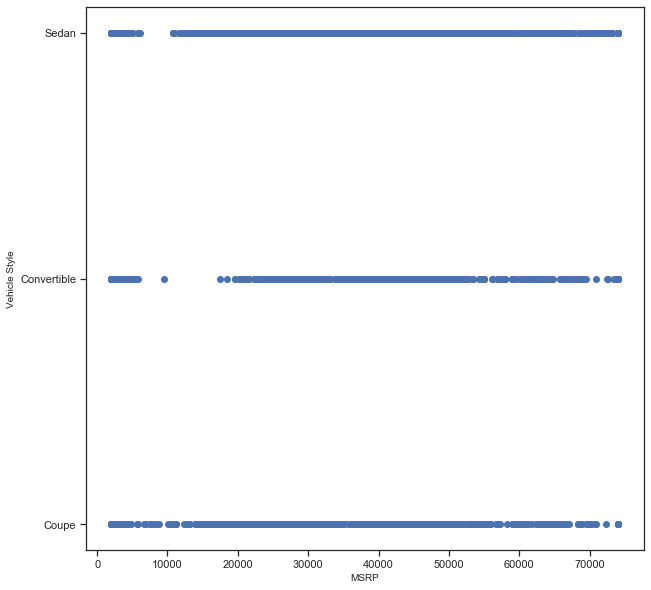

In [400]:
data_filter3 = data.loc[data['Vehicle Style'].isin(['Sedan','Convertible','Coupe'])]
#data_pivot_mobil=data_mobil.groupby(['Make','Vehicle Style'])['Make'].count()
#data_pivot_mobil.reset_index(name='Count')

data_filter3
plt.figure(figsize=(10,10))
plt.scatter(data_filter3['MSRP'], data_filter3['Vehicle Style'])

plt.xlabel('MSRP', fontsize=10)
plt.ylabel('Vehicle Style', fontsize=10)

plt.show()


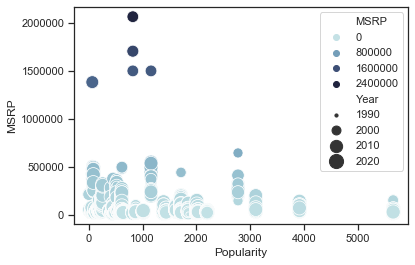

In [284]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
axy = sns.scatterplot(x="Popularity", y="MSRP",
                     hue="MSRP", size="Year",
                     palette=cmap, sizes=(10, 200),
                     data=data)

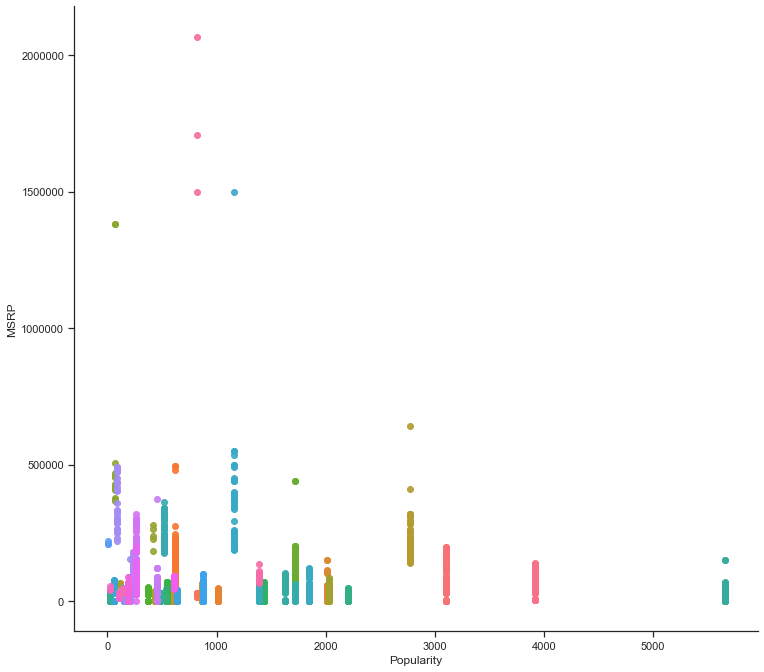

In [306]:
# Not Important
g = sns.PairGrid(df, y_vars=["MSRP"], x_vars=["Popularity"], height=9.5, hue="Make", aspect=1.1)
gx = g.map(plt.scatter, alpha=0.9)

In [283]:
#Top Ten Popularity car types
data.nsmallest(10,'Popularity')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2116,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,18,13,2,209990
2117,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,18,13,2,219990
2118,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,18,13,2,209990
5202,Genesis,G80,2017,regular unleaded,311.0,6.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,28,18,21,41400
5204,Genesis,G80,2017,regular unleaded,311.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,16,21,43900
5203,Genesis,G80,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Sedan,23,15,21,54550
3302,Oldsmobile,Cutlass Calais,1990,regular unleaded,180.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,29,19,26,2000
3301,Oldsmobile,Cutlass Calais,1990,regular unleaded,110.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,30,19,26,2000
3300,Oldsmobile,Cutlass Calais,1990,regular unleaded,180.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,29,19,26,2000
3299,Oldsmobile,Cutlass Calais,1990,regular unleaded,160.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,28,20,26,2000


In [333]:
# Continue

In [193]:
#Top Ten Popularity Car
Make=data.groupby(['Make','Popularity'])['Popularity'].unique()
Make.reset_index(name='Pop').sort_values(by='Popularity', ascending=True).head(5)

,Make,Popularity,Pop
41,Spyker,2,[2]
16,Genesis,21,[21]
34,Oldsmobile,26,[26]
25,Lincoln,61,[61]
28,Maybach,67,[67]


## Corelation

In [194]:
data.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.350573,-0.041459,0.263946,0.258240,0.198171,0.073049,0.227590
Engine HP,0.350573,1.000000,0.767037,-0.102934,-0.359457,-0.353894,0.036823,0.661402
Engine Cylinders,-0.041459,0.767037,1.000000,-0.140026,-0.600947,-0.565124,0.040815,0.531139
Number of Doors,0.263946,-0.102934,-0.140026,1.000000,0.118925,0.121206,-0.048251,-0.126081
highway MPG,0.258240,-0.359457,-0.600947,0.118925,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.353894,-0.565124,0.121206,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.036823,0.040815,-0.048251,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.661402,0.531139,-0.126081,-0.160043,-0.157676,-0.048476,1.000000


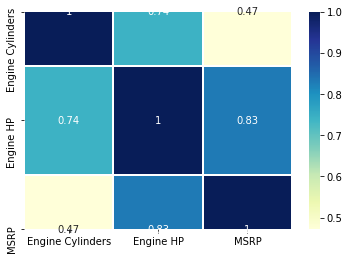

In [196]:
correlation = data[['Engine Cylinders', 'Engine HP','MSRP']].\
                corr(method='spearman')
sns.heatmap(correlation, annot=True, linewidths=1, cmap="YlGnBu")
plt.show()

In [ ]:
# Engine HP and Engine Cylinder have highest coralation with MSRP so that need further analyze 

### Working With Outliers

In [ ]:
# Start Working with outliers

In [302]:
## IQR Method
q1 = data['MSRP'].quantile(0.25)
q3 = data['MSRP'].quantile(0.75)

iqr = q3-q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [303]:
data.loc[(data['MSRP']>upper_bound),'MSRP'] = upper_bound
data.loc[(data['MSRP']<lower_bound),'MSRP'] = lower_bound

In [304]:
outliers = data[(data['MSRP']>upper_bound)|(data['MSRP']<lower_bound)]
print(len(outliers['MSRP']))
outliers['MSRP'].head()

0


Series([], Name: MSRP, dtype: float64)

Text(0.5, 0, 'MSRP')

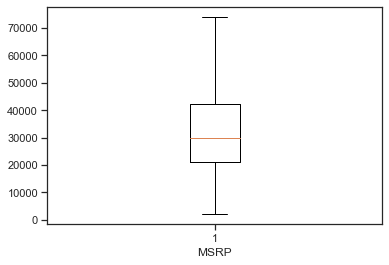

In [305]:
plt.boxplot(data['MSRP'])
plt.xlabel('MSRP')

In [307]:
def find_outliers(x):
    if x.dtype == 'O':
        return x
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)

    iqr = q3-q1

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    outliers = x[(x>upper_bound)|(x<lower_bound)]

    x[(x>upper_bound)] = upper_bound
    x[(x<lower_bound)] = lower_bound
    return x

In [312]:
data = data.apply(find_outliers,axis=0)

C:\Users\Rifyal\Anaconda2\envs\p37workshop\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rifyal\Anaconda2\envs\p37workshop\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


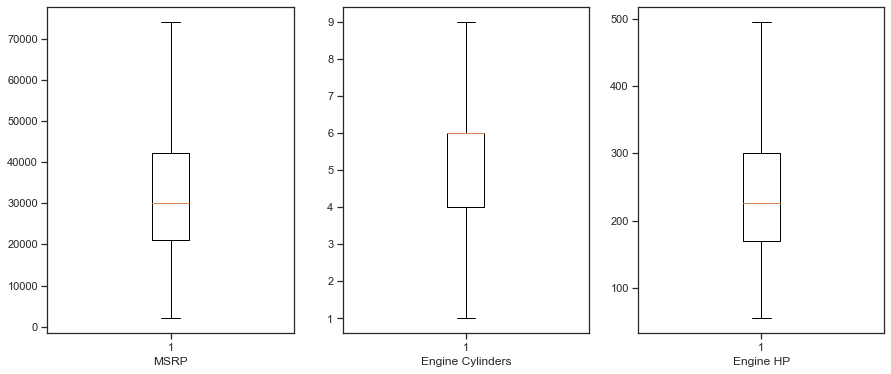

In [313]:
#Working with Outliers
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.boxplot(data['MSRP'])
plt.xlabel('MSRP')

plt.subplot(1,3,2)
plt.boxplot(data["Engine Cylinders"])
plt.xlabel('Engine Cylinders')

plt.subplot(1,3,3)
plt.boxplot(data['Engine HP'])
plt.xlabel('Engine HP')

plt.show()

# After working with outliers

### Linear Regresion 1 MSRP - Engine Cylinders

In [314]:
model = LinearRegression()

In [315]:
x = np.array(data["Engine Cylinders"]).reshape((-1, 1))
y = np.array(data["MSRP"])

In [316]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [317]:
model = LinearRegression().fit(x, y)

In [318]:
r_sq = model.score(x, y)

In [321]:
print('r square: ', r_sq)
print('coefficient of determination:', model.score)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

r square:  0.22580712776844747
coefficient of determination: <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
intercept: -769.9324644378466
slope: [5968.24072165]


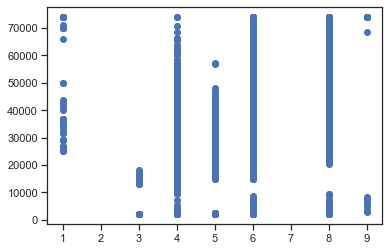

In [322]:
plt.scatter(data['Engine Cylinders'], data['MSRP'])

### Linear Regresion 2 MSRP - Engine Cylinders

In [324]:
model2 = LinearRegression()

In [325]:
X2 = np.array(data["Engine HP"]).reshape((-1, 1))
y2 = np.array(data["MSRP"])

In [326]:
model2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [327]:
model2 = LinearRegression().fit(X2, y2)

In [328]:
r_sq2 = model2.score(X2, y2)

In [329]:
print('r square: ', r_sq2)
print('coefficient of determination:', model2.score)
print('intercept:', model2.intercept_)
print('slope:', model2.coef_)

r square:  0.6826726321734788
coefficient of determination: <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>
intercept: -8176.745253286459
slope: [165.27662556]


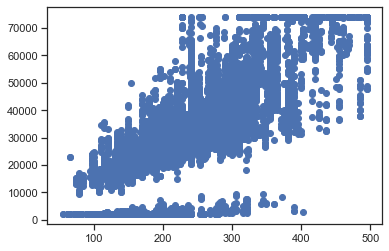

In [330]:
plt.scatter(data['Engine HP'], data['MSRP'])

## Conclusion
1. From descriptive statistics, we can conclude some majority of count such as regular unleaded is the most common engine fuel type, engine cylinder is 4, automatic is most commong transmission type, etc.
2. Correlation table show that both engine hp and engine cylinder has highest correlation with MSRP. So that we need to dig it deeper about how much the variable impact MSRP. So then wen heatmapping and it is showing that engine hp has 0.83 while engine cylinder has 0.47. 
3. Then we dig it deeper by using linear regression which show that r square value of engine cylinder versus MSRP is 0.22, while r square value of engine hp versus MSRP is 0.68. So the conclussion of linear regression is, we are recommended to use the engine hp versus MSRP model because the r square is quite satisfiying which is 0.68, and we are not recommended to use the engine cylinder because the model cant figure the real sample so that the r square is only 0.22.

## Business Insight
1. For company of car maker, the most favorite vehicle style is sedan and 4dr SUV. So for Bugatti, the one of expensive car, doesnt have sedan and convertible. While lamborgini doesnt have the sedan vehicle style. And mybach doest have coupe style. So we suggest that bugaati need to try the most popular and favorite vehicle style by trying new market in sedan and convertible style. While lamborgini need to try sedan style and maybach need to try new market on coupe.
2. Automatic transmission type is the most popular for car manufacturing right now. So both the favorite vehicle style such convertible and sedan alreany manufacture most of its car model in automatic transmission type. But the coupe type still dominant with manual transmission type. So we think that expand the bussiness in the automatic transmission for the coupe vehicle style also the option